# Simulating a Magnetic Lens in a Scanning Electron Microscope
__Agustin Garcia Flores*, Michael Reaves, & Guillermo Velez Bustamante__  
**PHY432: Computational Methods in Physics**  
**Dr. Oliver Beckstein**
$\newcommand{\br}[1]{\left[#1\right]}
\newcommand{\pa}[1]{\left(#1\right)}
\newcommand{\cb}[1]{\left\{#1\right\}}$

<p style="text-align: center; padding-left: 10%; padding-right: 10%;">
<b>Abstract:</b> 
This project aimed to simulate the magnetic lens component of a scanning electron microscope (SEM), crucial for focusing an electron beam to achieve high-resolution imaging. Utilizing computational methods, we developed a simulation model to study the magnetic field's behavior within the lens and its impact on electron trajectories. The project involved deriving the expressions for radial and longitudinal magnetic field components in cylindrical coordinates, implementing these equations to simulate the lens's focusing action, and analyzing the effects of varying the lens parameters. Our findings underscore the significance of the magnetic lens in SEM operation, demonstrating how its geometry and magnetic field strength dictate the beam's focus and resolution. This simulation offers valuable insights into the design and optimization of magnetic lenses in SEMs and potentially other electron-beam instruments, contributing to the advancement of microscopic imaging technologies.
</p>

## 0. Introduction
This project involves simulating a major component of a scanning electron microscope (SEM). Simulations of this type are common in the creation of such instruments; similar ideas apply to the construction of particle accelerators and X-ray sources. Due to time constraints, this project will only look at one of the major components: the magnetic lens.

### 0.1 Scanning Electron Microscope (SEM)
A scanning electron microscope employs an electron source to create a narrow beam of electrons that scans over a sample and analyzes the interaction of the beam with the substance (Figure 1). It is a flexible tool for characterizing and analyzing solid microstructures.  
  
The electron gun generates electrons and accelerates them to typical beam energies ranging from 0.2 to 40 keV. A heated tungsten filament emits electrons, which are focused to a 100 $\mu\hspace{-0.08cm}$ m diameter point using a biasing cylinder and accelerated by an anode. Electrons move in a vacuum to prevent particle interference with the electron beam.  
  
The condenser lens is an electromagnetic lens that demagnifies the beam point and narrows it down to 50-200 nm. As an example, we'll look at a solenoid as a magnetic lens.  
  
The objective lens is another electromagnetic lens that focuses the beam to a final spot size of around 5 nm. The beam is raster scanned across the sample using the scanning coils. The beam electrons interact with the material, resulting in secondary electrons that are detected by the detector, which is linked to imaging electronics.  

<figure style="text-align: center;">
    <img src="../Submission/JEOL_SEM.png" alt="This is an image of an SEM." style="width: 50%; min-width: 30em;">
    <figcaption><b>Figure 1.</b> Structure of an SEM. On the left we see the optical microscope, and on the right is the SEM. Source: <a href="https://www.manualslib.com/manual/37014/Jeol-Jsm-6060lv.html?page=4#manual">JEOL JSM-6060LV Operating Instructions Manual</a>.</figcaption>
</figure>

### 0.2 Magnetic Field in Cylindrical Coordinates
The SEM and electron beam are both cylindrical in shape, with all components being axially symmetric. To discuss electric and magnetic fields, we use cylindrical coordinates $(r, \phi, z)$ with the beam direction along the positive z-axis. Recall that the cylindrical unit vectors are

\begin{align*}
    \hat{\mathbf{e}}_r(x,y,z) &= \frac{1}{\sqrt{x^2+y^2}}\begin{pmatrix} x \\ y \\ 0 \end{pmatrix} = \begin{pmatrix} \cos\phi \\ \sin\phi \\ 0 \end{pmatrix}, \\
    \hat{\mathbf{e}}_\phi(x,y,z) &= \frac{1}{\sqrt{x^2+y^2}}\begin{pmatrix} -y \\ x \\ 0 \end{pmatrix} = \begin{pmatrix} -\sin\phi \\ \cos\phi \\ 0 \end{pmatrix}, ~ \& \\
    \hat{\mathbf{e}}_z(x,y,z) &= \begin{pmatrix} 0 \\ 0 \\ 1 \end{pmatrix}.
\end{align*}

If the magnetic field, $\mathbf{B}$, is analyzed in terms of its radial and longitudinal components, $B_r$ and $B_z$, respectively, one can write $\mathbf{B}$ as

\begin{equation}
    \tag{0}
    \mathbf{B} = B_r\hat{\mathbf{e}}_r + B_z\hat{\mathbf{e}}_z,
\end{equation}

note that the azimuthal component, $B_\phi$, vanished due to rotational symmetry.  
  
If $B_r$ and $B_z$ are given, the same quantity can be evaluated in Cartesian coordinates,

$$\mathbf{B}(x,y,z) = B_r\left(r(x,y), z\right)\hat{\mathbf{e}}_r(x,y,z) + B_z(z)\hat{\mathbf{e}}_z,$$

where $r(x,y) = \sqrt{x^2+y^2}$.

### 0.3 Solenoid as a Magnetic Lens
A solenoid is made up of a conducting coil that has been tightly coiled into a helix of length $L$ and radius $R$. A magnetic field $\mathbf{B}$ is generated when an electrical current $I$ flows through the $N$ coils. The ideal infinite solenoid (with winding density $n = N/L$) produces a constant field

$$B_0 = \mu_0nI$$

inside. Feasible solenoids have a finite length $L$ and a variable magnetic field at the entry and exit, known as the fringe field. The inhomogeneity in the field can be utilized for solenoidal focusing, where the solenoid acts as a magnetic lens for a particle beam ([Kumar, 2009](#references)).  
  
Along the $z$-axis, the expression for the $z$ component of the magnetic field of the solenoid is

\begin{equation}
    \tag{1}
    B_z(z) = \frac{1}{2}B_0\left[\cos\phi_1(z) - \cos\phi_2(z)\right]
\end{equation}

where

\begin{equation}
    \tag{2}
    \cos\phi_i(z) = \frac{z-z_i}{\sqrt{(z-z_i)^2 + R^2}}
\end{equation}

are the angles that a point on the $z$ axis makes with the coil at the beginning of the solenoid, $z_1$, and at the end of the solenoid, $z_2$. Note that $z_2 - z_1 = L$, as sign in the figure below:

<figure style="text-align: center;">
    <img src="../Submission/solenoid.png" alt="Image of a solenoid" style="width: 50%; min-width: 30em;">
    <figcaption><b>Figure 2.</b> A solenoid with the definition of the angles.
    </figcaption>
</figure>

The radial component of the solenoid field is

$$B_r(r,z) = -\frac{r}{2}B^\prime_z(z) = -\frac{r}{2}\frac{dB_z}{dz}.$$

From equations (1) and (2), we can then see that

\begin{align*}
    B_r(r,z) &= -\frac{r}{2}\frac{dB_z}{dz} \\
    &= -\frac{r}{2}\frac{d}{dz}\cb{\frac{1}{2}B_0\br{\cos\phi_1(z) - \cos\phi_2(z)}}, \text{ from equation (1)} \\
    &= -\frac{rB_0}{4}\frac{d}{dz}\cb{\frac{z-z_1}{\sqrt{\pa{z-z_1}^2 + R^2}} - \frac{z-z_2}{\sqrt{\pa{z-z_2}^2 + R^2}}}, \text{ from equation (2)} \\
    &= -\frac{rB_0}{4}\frac{d}{dz}\cb{\pa{z-z_1}\br{\pa{z-z_1}^2 + R^2}^{-1/2} - \pa{z-z_2}\br{\pa{z-z_2}^2 + R^2}^{-1/2}} \\
    &= -\frac{rB_0}{4}\cb{\frac{1}{\br{\pa{z-z_1}^2 + R^2}^{1/2}} - \frac{\pa{z-z_1}^2}{\br{\pa{z-z_1}^2 + R^2}^{3/2}} - \frac{1}{\br{\pa{z-z_2}^2 + R^2}^{1/2}} + \frac{(z-z_2)^2}{\br{\pa{z-z_2}^2 + R^2}^{3/2}}} \\
    &= -\frac{rB_0}{4}\cb{\frac{\br{\pa{z-z_1}^2 + R^2} - \pa{z-z_1}^2}{\br{\pa{z-z_1}^2 + R^2}^{3/2}} + \frac{\pa{z-z_2}^2 - \br{\pa{z-z_2}^2 + R^2}}{\br{\pa{z-z_2}^2 + R^2}^{3/2}}} \\
    &= -\frac{rB_0}{4}\cb{\frac{R^2}{\br{\pa{z-z_1}^2 + R^2}^{3/2}} - \frac{R^2}{\br{\pa{z-z_2}^2 + R^2}^{3/2}}},
\end{align*}

so

\begin{equation}
    \tag{3}
    \boxed{B_r\pa{r,z} = \frac{rB_0R^2}{4}\cb{\frac{1}{\br{\pa{z-z_2}^2 + R^2}^{3/2}} - \frac{1}{\br{\pa{z-z_1}^2 + R^2}^{3/2}}}.}
\end{equation}

The ideal, infinite solenoid's $\mathbf{B}$-field is constant along the axis $\pa{B_z^\prime (z) = 0}$, thus with no radial component. However, the field of the finite solenoid does not disappear everywhere. It varies near the ends ($z_1$ and $z_2$) and vanishes within the coil's constant and homogenous region $\pa{B_z}$. Inhomogeneous $B_r$ changes the course of electrons that do not enter on the axis. The solenoid can operate as a magnetic lens by focusing electrons into a narrow region at a specific focal length $f$ ([Kumar, 2009](#references)).

### 0.4 Lorentz Force
A particle with charge $q$ experiences the Lorentz force,

$$\mathbf{F}_L = q\pa{\mathbf{v}\times\mathbf{B}\pa{\mathbf{r}} + \mathbf{E}\pa{\mathbf{r}}}$$

when moving with velocity $\mathbf{V}$ in a magnetic field $\mathbf{B}$ and electric field $\mathbf{E}$. The equations of motion of an electron are then

$$\frac{d^2\mathbf{r}}{dt^2} = m_e^{-1}\mathbf{F}_L\pa{\mathbf{r}, \mathbf{v}}$$

for the position $\mathbf{r}$ and velocity $\mathbf{v}$.

### 0.5 Useful Constants and Units
Finally, we include a table below with useful constants for the project, their symbol, value, and SI unit.

| Constant                   | Symbol       | Value                                   | SI unit           |
| :------------------------- | :----------- | --------------------------------------: | :---------------- |
| Speed of light (in vacuum) | $c$          | $\text{299 792 458}$                    | $\text{m s}^{-1}$ | 
| Electron charge            | $e$          | $\text{1.602 176 634}\times 10^{-19}$   | $\text{A s}$      |
| Electron mass              | $m_e$        | $\text{9.109 383 701 5}\times 10^{-31}$ | $\text{kg}$       |
| Magnetic constant          | $\mu_0$      | $\text{1.256 637 062 12}\times 10^{-6}$ | $\text{N A}^{-2}$ |
| Electric constant          | $\epsilon_0$ | $\text{8.854 187 812 8}\times 10^{-12}$ | $\text{F m}^{-1}$ |

**Table 1.** Useful constants and units. Souce: [NIST Reference on Constants, Units, and Uncertainty](https://physics.nist.gov/cuu/Constants/index.html).

Where $\text{m} :=$ meter (for length), $\text{s} :=$ second (for time), $\text{A} :=$ ampere (for electric current), $\text{kg} :=$ kilogram (for mass), $\text{N} :=$ newton (for force), and $\text{F} :=$ farad (for electric capacitance).  
  
Note, the unit for the magnetic flux density, i.e. the "magnetic field" $\mathbf{B}$, is Tesla $\text{T}$ or $\text{kg.s}^{-2}\text{.A}^{-1}$. The unit of the electric field $\mathbf{E}$ is $\text{v.m}^{-1}$.

## 1. Methods
In this section, we go through the required objectives of the project. We include our code and any necessary background information, such as the following table.

| Quantity             | Symbol       | Value             | Unit              |
| :------------------- | :----------- | ----------------: | :---------------- |
| Initial velocity     | $v_0$        | $0.06c$           | $\text{m s}^{-1}$ | 
| Initial $z$ position | $z_0$        | $-0.3$            | $\text{m}$        |
| Lens length          | $L$          | $0.2$             | $\text{m}$        |
| Lens radius          | $R$          | $0.1$             | $\text{m}$        |
| Lens magnetic field  | $B_0$        | $1\times 10^{-3}$ | $\text{T}$        |
| Lens opening $z$     | $z_1$        | $0$               | $\text{m}$        |

**Table 2.** Minimal parameters for magnetic lens simulations.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

### 1.1 Required objectives
#### 1.
An expression for $B_r$ has already been derived as equation (3) in section [0.3 Solenoid as a Magnetic Lens](###0.3-Solenoid-as-a-Magnetic-Lens), the result was

$$B_r\pa{r,z} = \frac{rB_0R^2}{4}\cb{\frac{1}{\br{\pa{z-z_2}^2 + R^2}^{3/2}} - \frac{1}{\br{\pa{z-z_1}^2 + R^2}^{3/2}}}.$$

#### 2.
Recall, from equations (1) and (2),

$$B_z(z) = \frac{1}{2}B_0\left[\cos\phi_1(z) - \cos\phi_2(z)\right]$$

where

$$\cos\phi_i(z) = \frac{z-z_i}{\sqrt{(z-z_i)^2 + R^2}},$$

so

$$\frac{B_z(z)}{B_0} = \frac{1}{2}\br{\frac{z-z_1}{\sqrt{(z-z_1)^2 + R^2}} - \frac{z-z_2}{\sqrt{(z-z_2)^2 + R^2}}}.$$

From [Table 2](#1-methods), we know that the lens opening, $z_1$, is $0$ m, the length of the lens, $L$, is $0.2$ m, the lens radius, $R$, is $0.1$ m, and the initial $z$ position is $-0.3$ m. From the geometry of the system, as seen in [Figure 2](###0.3-Solenoid-as-a-Magnetic-Lens), we can find the value of $z_2$ by $z_2 - z_1 = L \Rightarrow z_2 = z_1 + L = 0.2$ m. Thus,

$$\frac{B_z(z)}{B_0} = \frac{1}{2}\br{\frac{z}{\sqrt{z^2 + 0.1^2}} - \frac{z-0.2}{\sqrt{(z-0.2)^2 + 0.1^2}}}.$$

We can now create a function, `Bz_B0`, that plots this expression for different values of $z$.

In [3]:
def Bz_B0(z, z1, z2, R):
    return 0.5 * (((z - z1) / np.sqrt((z-z1)**2 + R**2)) - ((z-z2) / np.sqrt((z-z2)**2 + R**2)))

Now defining the variables as those defined in the table and plotting $B_z(z)/B_0$,

In [4]:
%%capture
z0 = -0.3       # Initial z position (m)
z1 = 0          # Lens opening (m)
L0 = 0.2        # Lens length (m)
R0 = 0.1        # Lens radius (m)
z2 = z1 + L0    # Lens ending (m)

dz = 0.01        # m

z = np.arange(z0, 1, dz)    # Array for simulation (m)

Bz = Bz_B0(z, z1, z2, R0)   # Computing B_z/B_0 for z array (1)

# Plotting results
plt.plot(z, Bz, label=r'$\frac{B_z(z)}{B_0}$')

plt.axvline(x=z1, color='dimgray', linestyle='--', label=r'$z_1$')
plt.axvline(x=z2, color='darkgray', linestyle='--', label=r'$z_2$')

plt.text(z1, 0, r'$z_1$', ha='right', va='bottom', fontsize=12)
plt.text(z2, 0, r'$z_2$', ha='right', va='bottom', fontsize=12)

plt.xlabel(r'$z$ Position (m)')
plt.ylabel(r'$B_z(z)/B_0$ (1)')
plt.title(fr'Plot of $B_z(z)/B_0$ for $L$ = {L0} and $R$ = {R0}')

plt.legend()
plt.savefig('2a_table_parameters')

We can then repeat this process for another lens with $L = 0.75$ m and $R = 0.05$ m.

In [5]:
%%capture
# z0, z1, dz, and z remain unchanged
L1 = 0.75       # Lens length (m)
R1 = 0.05       # Lens radius (m)
z2 = z1 + L1    # Lens ending (m)

Bz1 = Bz_B0(z, z1, z2, R1)  # Computing B_z/B_0 for z array (1)

# Plotting results
plt.plot(z, Bz1, label=r'$\frac{B_z(z)}{B_0}$')

plt.axvline(x=z1, color='dimgray', linestyle='--', label=r'$z_1$')
plt.axvline(x=z2, color='darkgray', linestyle='--', label=r'$z_2$')

plt.text(z1, 0, r'$z_1$', ha='right', va='bottom', fontsize=12)
plt.text(z2, 0, r'$z_2$', ha='right', va='bottom', fontsize=12)

plt.xlabel(r'$z$ Position (m)')
plt.ylabel(r'$B_z(z)/B_0$ (1)')
plt.title(fr'Plot of $B_z(z)/B_0$ for $L$ = {L1} and $R$ = {R1}')

plt.legend()
plt.savefig('2b_given_parameters')

#### 3.
From [Equation (3)](###03-solenoid-as-a-magnetic-lens), we can conclude that

$$\frac{B_r\pa{r,z}}{B_0} = \frac{rR^2}{4}\cb{\frac{1}{\br{\pa{z-z_2}^2 + R^2}^{3/2}} - \frac{1}{\br{\pa{z-z_1}^2 + R^2}^{3/2}}}.$$

We can plot this, using the same array we've been using for $z$, for different values of $0\leq r\leq R$. We start by defining a function, `Br_B0`, which computes this function for parameters $z$, $z_1$, $z_2$, $r$, and $R$.

In [6]:
def Br_B0(z, z1, z2, r, R):
    return (0.25 * r * R**2) * (((z-z2)**2 + R**2)**(-3/2) - ((z-z1)**2 + R**2)**(-3/2))

In [7]:
Br_B0(4, 1, 2, 0.5, 1)

0.007227492812288475

Now defining the variables necessary for the simulation.

In [8]:
%%capture
# Reusing the values for z0, z1, L0, R0, dz, and z
z2 = z1 + L0    # Lens ending (m)

r = np.linspace(0, R0, 5)   # Radial distance from z (m)

# Computing Br/B0 for varying values of z and r
Br = [Br_B0(z, z1, z2, r_val, R0) for r_val in r]

# Plotting result
plt.figure(figsize=(6.4,4.8))
for i, r_val in enumerate(r):
    plt.plot(z, Br[i], label=fr'$r$ = {r_val:.2f} m')

plt.axvline(x=z1, color='dimgray', linestyle='--', label=r'$z_1$')
plt.axvline(x=z2, color='darkgray', linestyle='--', label=r'$z_2$')

plt.text(z1, 0, r'$z_1$', ha='right', va='bottom', fontsize=12)
plt.text(z2, 0, r'$z_2$', ha='right', va='bottom', fontsize=12)

plt.xlabel(r'$z$ Position (m)')
plt.ylabel(r'$B_r(r,z)/B_0$ (1)')
plt.title(fr'Plot of $B_r(r,z)/B_0$ for $L$ = {L0} and $R$ = {R0}')

plt.legend()
plt.savefig('3a_table_parameters')

We can repeat this process for another lens with $L = 0.75$ and $R = 0.05$ m.

In [9]:
%%capture
# Reusing the values for z0, z1, L1, R1, dz, and z
z2 = z1 + L1    # Lens ending (m)

r = np.linspace(0, R1, 5)   # Radial distance from z (m)

# Computing Br/B0 for varying values of z and r
Br1 = [Br_B0(z, z1, z2, r_val, R1) for r_val in r]

# Plotting result
plt.figure(figsize=(6.4,4.8))
for i, r_val in enumerate(r):
    plt.plot(z, Br1[i], label=fr'$r$ = {r_val:.2f} m')

plt.axvline(x=z1, color='dimgray', linestyle='--', label=r'$z_1$')
plt.axvline(x=z2, color='darkgray', linestyle='--', label=r'$z_2$')

plt.text(z1, 0, r'$z_1$', ha='right', va='bottom', fontsize=12)
plt.text(z2, 0, r'$z_2$', ha='right', va='bottom', fontsize=12)

plt.xlabel(r'$z$ Position (m)')
plt.ylabel(r'$B_r(r,z)/B_0$ (1)')
plt.title(fr'Plot of $B_r(r,z)/B_0$ for $L$ = {L1} and $R$ = {R1}')

plt.legend()
plt.savefig('3b_given_parameters')

#### B field, Lorentz force, and beam simulation

In [10]:
def B_field(p, B0=1e-3, R=0.1, z1=0, z2=0.2):
    """Returns B field vector at position p(x,y,z) given B0 and lens radius R
    """
    x = p[0]
    y = p[1]
    z = p[2]
    r = np.sqrt(x**2 + y**2)
    
    # B field components
    Br = B0 * Br_B0(z, z1, z2, r, R)
    Bz = B0 * Bz_B0(z, z1, z2, R)
    
    # Unit vectors
    ez = np.array([0, 0, 1])
    
    # In case r = 0
    if r == 0:
        er = np.array([0, 0, 0])
    else:
        er = np.array([x, y, 0]) / r
        
    return Br*er + Bz*ez
    

In [11]:
def F_lorentz(v, B):
    return -1.6022e-19 * np.cross(v, B)

In [12]:
def beam_simulation(r0, v0, B0=1e-3, R=0.1, tmax=80e-9, h=1e-10):
    """Simulates electron beam traveling through magnetic lens
    Parameters
    ----------
    r0: initial position [x, y, z]
    v0: initial velocity [vx, vy, vz]
    tmax: duration of simulation, default is 10 microseconds
    h: time step, default is 1 nanosecond
    
    Returns
    -------
    Arrays of positions, velocities, and time series of electron through simulation
    """

    q = -1.602e-19  # Coulombs
    m_e = 9.11e-31  # kg

    Nsteps = int(tmax/h)
    t_range = h * np.arange(Nsteps)
    
    y = np.array([r0[0], r0[1], r0[2], v0[0], v0[1], v0[2]], dtype=np.float64)
    
    positions = [[y[0], y[1], y[2]]]
    velocities = [[y[3], y[4], y[5]]]
    
    # Standard form force function
    def f(t, y, m=m_e):
        # y = [x, y, z, vx, vy, vz]
        r = np.array([y[0], y[1], y[2]])
        v = np.array([y[3], y[4], y[5]])
        B = B_field(r)
        F = F_lorentz(v, B)
        return np.array([y[3], y[4], y[5], F[0]/m, F[1]/m, F[2]/m])
    
    # rk4
    for i, t in enumerate(t_range[:-1]):
        k1 = f(t, y)
        k2 = f(t + 0.5*h, y + 0.5*h*k1)
        k3 = f(t + 0.5*h, y + 0.5*h*k2)
        k4 = f(t + h, y + h*k3)
        y += h/6 * (k1 + 2*k2 + 2*k3 + k4)
        positions.append([y[0], y[1], y[2]])
        velocities.append([y[3], y[4], y[5]])
        
    return np.array(positions), np.array(velocities), t_range


#### 4. Integrating Equations of Motion for Solenoid and Lens
 The purpose of using the rk4 algorithm in the beam simulator that Guillermo provided is that we would find the rk4 algorithm more accurate over small time steps along with being an overall general ODE solver. We don't plan on worrying about energy conservation as much because we are choosing a relatively short time duration to run the simulation.

First, we plan to initialize our constants and define our functions. Guillermo has provided us with the beam simulation function and the magnetic field function above that would allow us to integrate the equations of motion. I needed to make a slight addition in order to incorporate the L value for a solenoid into this integrator. Before this we would need to establish the Lorentz force function and implement the magnetic field function into the Lorentz force.

In [13]:
def beam_simulation(r0, v0, z2, B0=1e-3, R=0.1, tmax=80e-9, h=1e-10):
    Nsteps = int(tmax/h)
    t_range = h * np.arange(Nsteps)
    
    y = np.array([r0[0], r0[1], r0[2], v0[0], v0[1], v0[2]], dtype=np.float64)
    
    positions = [[y[0], y[1], y[2]]]
    velocities = [[y[3], y[4], y[5]]]
    
    # Standard form force function
    def f(t, y, m=m_e):
        # y = [x, y, z, vx, vy, vz]
        r = np.array([y[0], y[1], y[2]])
        v = np.array([y[3], y[4], y[5]])
        B = B_field(r, z2 = z2)
        F = F_lorentz(v, B)
        return np.array([y[3], y[4], y[5], F[0]/m, F[1]/m, F[2]/m])
    
    # rk4
    for i, t in enumerate(t_range[:-1]):
        k1 = f(t, y)
        k2 = f(t + 0.5*h, y + 0.5*h*k1)
        k3 = f(t + 0.5*h, y + 0.5*h*k2)
        k4 = f(t + h, y + h*k3)
        y += h/6 * (k1 + 2*k2 + 2*k3 + k4)
        positions.append([y[0], y[1], y[2]])
        velocities.append([y[3], y[4], y[5]])
        
    return np.array(positions), np.array(velocities), t_range
# Initialize variables
# constants
m_e = 9.11e-31
c = 2.998e8
mu0 = 1.257e-6
eps0 = 8.854e-12
e = 1.6022e-19

# Table 2 Lens
R = 0.1
L = 0.2
z1 = 0
B0 = B_field(p = np.array([3/4*R, 0, -0.3]))

# Solenoid
L_sol = 0.75
B_0_sol = B_field(p = np.array([3/4*R, 0, -0.3]), B0 = 0.0035, 
                  R = 0.1, z1 = 0, z2 = 0.75)

After our F_lorentz function is created we can then create the kinetic_energy() and relative_error() functions which are given below.

In [15]:
def kinetic_energy(m, v):
    return 0.5 * m * np.square(v)

def relative_error(T0, T):
    return np.abs(T / T0 - 1)

Now everything is created we finally need to create the plots for each of the functions that we receive. Plots will be created for the solenoid and lens. If you look to the comments you can see the plots for the sections of objective 4 are labeled.

/var/folders/k0/9_kl3_bd709gjr8yxm19g35m0000gn/T/ipykernel_65433/3051638458.py:5: RuntimeWarning: divide by zero encountered in divide
  return np.abs(T / T0 - 1)
/var/folders/k0/9_kl3_bd709gjr8yxm19g35m0000gn/T/ipykernel_65433/3051638458.py:5: RuntimeWarning: invalid value encountered in divide
  return np.abs(T / T0 - 1)
/var/folders/k0/9_kl3_bd709gjr8yxm19g35m0000gn/T/ipykernel_65433/82966491.py:17: RuntimeWarning: divide by zero encountered in log
  plt.plot(t, np.log(relative_error(T0, T)))


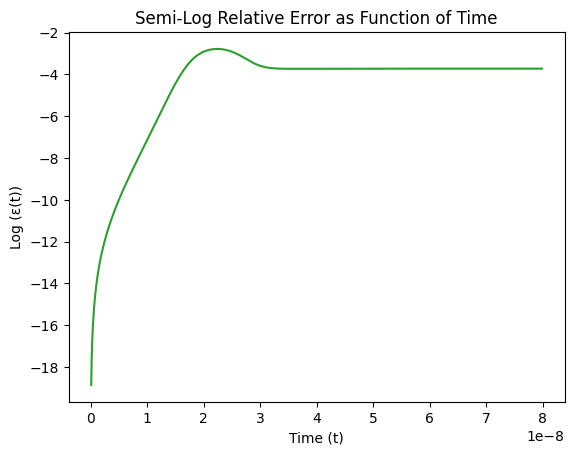

In [16]:
# Function Execute
if __name__ == "__main__":
    # Lens vectors
    r_0 = [3/4*R, 0, -0.3]
    v_0 = [0, 0, 0.06*c]

    r, v, t = beam_simulation(r_0, v_0, z2 = 0.2)
    
    # Solenoid Vectors
    r_sol, v_sol, t_sol = beam_simulation(r_0, v_0, B0 = 0.0035, R = 0.1, z2 = 0.75)
    
    
    T0 = kinetic_energy(m_e, v_0)
    T = kinetic_energy(m_e, v)
    
    # 4.b
    plt.plot(t, np.log(relative_error(T0, T)))
    plt.xlabel("Time (t)")
    plt.ylabel("Log (ε(t))")
    plt.title("Semi-Log Relative Error as Function of Time")
    plt.show()
    

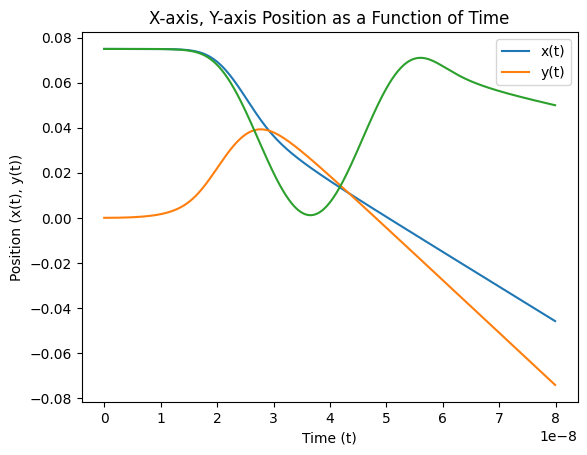

In [17]:
# Plots for x, y and r
    # 4.c
plt.plot(t, r[:, 0])
plt.plot(t, r[:, 1])
plt.plot(t, r_sol[:, 0])
plt.xlabel("Time (t)")
plt.ylabel("Position (x(t), y(t))")
plt.title("X-axis, Y-axis Position as a Function of Time")
plt.legend(["x(t)", "y(t)"])
plt.show()

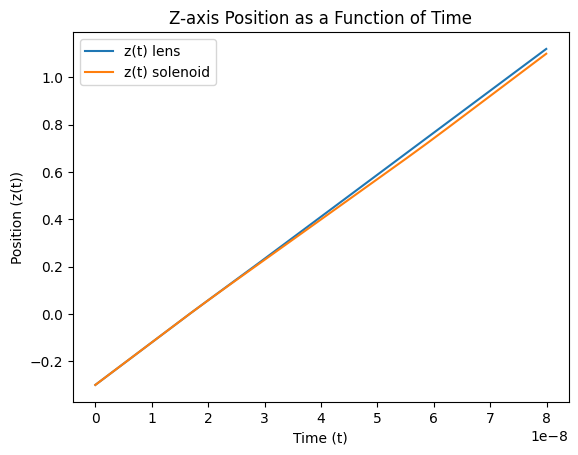

In [18]:
# 4.c 
plt.plot(t, r[:, 2])
plt.plot(t, r_sol[:, 2])
plt.title("Z-axis Position as a Function of Time")
plt.xlabel("Time (t)")
plt.ylabel("Position (z(t))")
plt.legend(["z(t) lens", "z(t) solenoid"])
plt.show()  

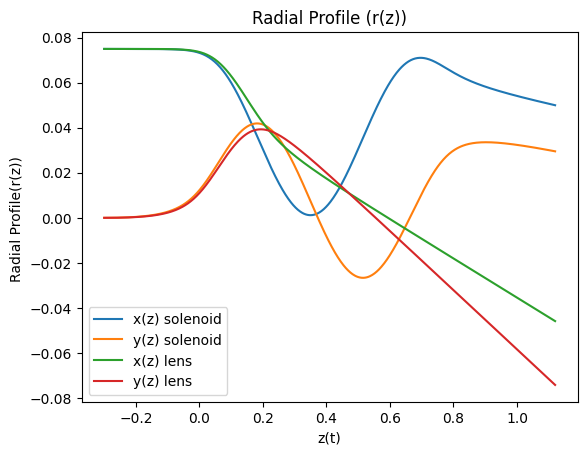

In [21]:
# 4.d
plt.plot(r[:, 2], r_sol[:, 0])
plt.plot(r[:, 2], r_sol[:, 1])
plt.plot(r[:, 2], r[:, 0])
plt.plot(r[:, 2], r[:, 1])
plt.title("Radial Profile (r(z))")
plt.legend(["x(z) solenoid", "y(z) solenoid", "x(z) lens", "y(z) lens"])
plt.xlabel("z(t)")
plt.ylabel("Radial Profile(r(z)) ")
plt.show()

#### 5.

#### Random initial positions

We can create a function `generate_random()` that will return a set of random initial conditions. Specifically, we will generate random x and y coordinates following a gaussian distribution centered at (0,0), while the z coordinate will always be set to the same value $z_0$ from **Table 2.** 

In [12]:
def generate_random(R=0.1, N=1000, z0=-0.3, sigma=None):
    """Generates array of N random initial (x,y,z0) positions
    within the lens radius R
    """
    if sigma is None:
        sigma = R/3
        
    import random
    r0 = np.zeros((N, 3))
    r0[:, 2] = z0
    for i in range(N):
        within_range = False
        while within_range == False:
            r0[i, 0] = random.gauss(mu=0, sigma=sigma)
            r0[i, 1] = random.gauss(mu=0, sigma=sigma)
            if np.sqrt(r0[i, 0]**2 + r0[i, 1]**2) < R:
                within_range = True
    return r0

The for loop in the function is designed to make sure that all of our initial positions are within the lens radius $R_0$.

#### Plot of generated initial conditions

Using `generate_random()`, we can now generate 1000 initial positions in which the electron beam make start out at the beginning of the simulation. A plot of these can be found in the **Results** section.

In [13]:
%%capture
r0 = generate_random()
fig, ax = plt.subplots()
fig.set_figheight(5)
fig.set_figwidth(5.4)
ax.plot(r0[:,0], r0[:,1], 'b.', alpha=0.5)
ax.set_xlabel('$x$ [m]')
ax.set_ylabel('$y$ [m]')
circle = plt.Circle((0,0), 0.1, fill=False)
ax.add_patch(circle)
plt.title("Plot of 1000 Randomly Generated Initial (x,y) Positions")
fig.tight_layout()
plt.savefig('5b_random_initial')

#### Example for 5 random inital conditions

As an example, we can run the `beam_simulation()` for 5 initial conditions obtained from `generate_random()` and plot the resulting trajectories. We will assume that every electron starts out with only a $z$ component for their velocity.

In [14]:
v0 = np.array([0, 0, 18e6]) # 0.06c m/s

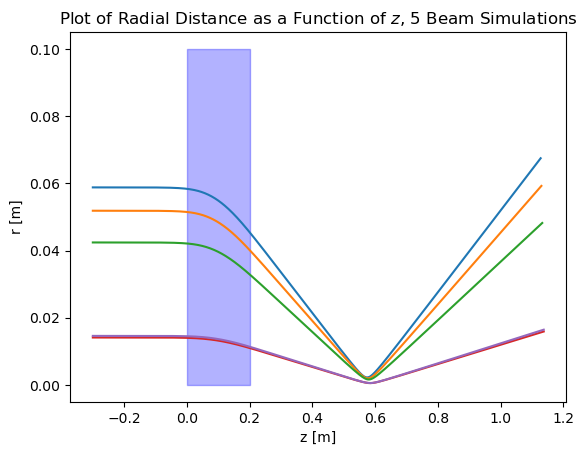

In [15]:
N = 5
r0 = generate_random(R0, N=N)

for i in range(N):
    trajectory = beam_simulation(r0[i], v0, tmax=80e-9, h=1e-10)[0]
    z = trajectory[:, 2]
    x, y = trajectory[:, 0], trajectory[:, 1]
    r = np.sqrt(x**2 + y**2)
    plt.plot(z, r)
    
plt.xlabel("z [m]")
plt.ylabel("r [m]")
plt.title("Plot of Radial Distance as a Function of $z$, 5 Beam Simulations")
plt.fill_between([0, 0.2],[0.1, 0.1], color='b', alpha=0.3)

**Figure 3.** Example of beam simulation for 5 initial conditions. Here, the shaded blue box represents the position of the magnetic lens. We can clearly observe the bending of the electron beam's path as it passes through the lens, after which it reaches a minimum radial distance at the focal point.

#### c. Full simulation for 100  initial conditions 

We can now run the simulation for 100 initial conditions and plot the paths of the electron beams.

In [16]:
%%capture
# This takes a bit to run
N = 100
rmin = []
f = []
for i in range(N):
    # run simulation
    r0 = generate_random(R0, N=1)[0]
    trajectory = beam_simulation(r0, v0, tmax=80e-9, h=1e-10)[0]
    
    # plot trajectory
    z = trajectory[:, 2]
    x, y = trajectory[:, 0], trajectory[:, 1]
    r = np.sqrt(x**2 + y**2)
    plt.plot(z, r)
    
    # minimum radial distance and focal length
    rmin.append(np.min(r))
    f_length = z[np.argmin(r)] - 0.2
    f.append(f_length)
    
plt.xlabel("z [m]")
plt.ylabel("r [m]")
plt.fill_between([0, 0.2],[0.1, 0.1], color='b', alpha=0.3)
plt.title("Beam Simulations for 100 Initial Conditions")
plt.savefig("5c_100_initial_conditions")

The lists `rmin` and `f` will help us keep track of the minimum radial distance and focal length achieved by each beam simulation. The focal length can be determined by finding the distance between the back of the coils (the point $z_2=0.2\ m$) and the $z$ coordinate that minimizes the radial distance.

#### Focal length and minimum distance

Having simulated the electron beam for 1000 initial conditions, we can observe the relationship between the focal point and the minimum radial distance achieved by each beam. More in **Results** section.

In [17]:
%%capture
N = 50
plt.plot(rmin, f, "r.", alpha=0.7)
plt.xlabel("$r_{min}$ [m]")
plt.ylabel("focal length [m]")
plt.title("Focal length vs Minimum Radial Distance")
plt.savefig("5d_focal_length")

## 2. Results and Discussion
We begin our discussion by looking at the impact the lens length, $L$, and lens radius, $R$, on the magnetic field vector $\mathbf{B}$. Note, as stated before, the azimuthal component vanished due to rotational symmetry, and as a result is ommitted here.

<figure style="text-align: center;">
    <div style="display: flex; justify-content: center; align-items: center; flex-wrap: wrap;">
        <div style="flex: 50%; text-align: center; padding: 10px; box-sizing: border-box;">
            <img src="../Submission/2a_table_parameters.png" alt="Resulting figure from required objective 2 (a)." style="min-width:20em; max-width: 100%; height: auto;">
            <figcaption><b>(a)</b> Longitudinal component</figcaption>
        </div>
        <div style="flex: 50%; text-align: center; padding: 10px; box-sizing: border-box;">
            <img src="../Submission/3a_table_parameters.png" alt="Resulting figure from required objective 3 (a)." style="min-width:20em; max-width: 100%; height: auto;">
            <figcaption><b>(b)</b> Radial component</figcaption>
        </div>
    </div>
</figure>

**Figure 4.** Calculation outcomes for the components of the magnetic field vector $\mathbf{B}$ of a realistic solenoid (in cylindrical coordinates), using parameter values of $L = 0.2$ m, $R = 0.1$ m, $z_1 = 0$ m, and $z_2 = 0.2$ m. The value of the field is given relative to $B_0$, the value for the homogeneous magnetic field of the ideal solenoid and plotted along $z$. In (b), the value of $B(r,z)$ is plotted for different values of $r$.

<figure style="text-align: center;">
    <div style="display: flex; justify-content: center; align-items: center; flex-wrap: wrap;">
        <div style="flex: 50%; text-align: center; padding: 10px; box-sizing: border-box;">
            <img src="../Submission/2b_given_parameters.png" alt="Resulting figure from required objective 2 (a)." style="min-width:20em; max-width: 100%; height: auto;">
            <figcaption><b>(a)</b> Longitudinal component</figcaption>
        </div>
        <div style="flex: 50%; text-align: center; padding: 10px; box-sizing: border-box;">
            <img src="../Submission/3b_given_parameters.png" alt="Resulting figure from required objective 3 (a)." style="min-width:20em; max-width: 100%; height: auto;">
            <figcaption><b>(b)</b> Radial component</figcaption>
        </div>
    </div>
</figure>

**Figure 5.** Calculation outcomes for the components of the magnetic field vector $\mathbf{B}$ of a realistic solenoid (in cylindrical coordinates), using parameter values of $L = 0.75$ m, $R = 0.05$ m, $z_1 = 0$ m, and $z_2 = 0.2$ m. The value of the field is given relative to $B_0$, the value for the homogeneous magnetic field of the ideal solenoid and plotted along $z$. In (b), the value of $B(r,z)$ is plotted for different values of $r$.  
  
Recall, from [Equation (3)](###03-solenoid-as-a-magnetic-lens), that the radial component is proportional to the derivative of the longitudinal component of the magnetic field. $r$ behaves as variable that alters the magnitude of the function, but the behavior of the radial component depends completely on the derivative of the longitudinal component. We also noted that the graphs of $B_r(r,z)/B_0$ have local extrema at the lens opening and ending, $z_1$ and $z_2$, respectively. We emphasize this by including dashed lines for $z_1$ and $z_2$ on each of the plots.

<figure style="text-align: center;">
    <img src="4.b_semilog.png" alt="relative_error_semilog">
</figure>

**Figure 6.** Graph for section 4.b which shows the semi-log-y graph of the relative error.

The kinetic energy is conserved from the looks of the curve because as the program runs in time t_range onward, the kinetic energy stabilizing and becomes constant around a smaller value.

<figure style="text-align: center;">
    <img src="4.c_x_y_pos.png" alt="x,y,time"">
</figure>

**Figure 7.** This graph above shoes the trajectory of the particle as functions of time for both the solenoid and magnetic lens. The positions giving are given in the x and y directions. 

<figure style="text-align: center;">
    <img src="4.c_z_pos.png" alt="z,time">
</figure>

**Figure 8.** The same section as above (4.c), this is the separated graph of the z-components as a function of time. As the graph above, the solenoid and lens are distinguished by the legend.

<figure style="text-align: center;">
    <img src="4.d_radial_prof.png" alt="radial profiles">
</figure>

**Figure 9.** Above are the radial profiles for both the solenoid and lens being compared of section 4.d.

It is difficult or impossible to determine the focal length of the solenoid because the function goes back to its starting radial profile. For the lens we can see that the focal length can be estimated to be about f = 0.9m.

<figure style="text-align: center;">
    <img src="../Submission/5b_random_initial.png" alt="random positions" style="width: 50%; min-width: 30em;">
</figure>

**Figure 10.** This image shows a scatter plot of the 1000 randomly generated initial conditions for the electron beam simulation. The black circle represents the boundary of the lens. Although some points get close to this boundary, we can see that no beams that start outside of the lens are accounted for. For the full simulation, we only used 100 initial conditions. Calculating more iterations is possible but results in longer computation times.

<figure style="text-align: center;">
    <img src="../Submission/5c_100_initial_conditions.png" alt="100 initial conditions" style="width: 50%; min-width: 30em;">
</figure>

**Figure 11.** Plotting the trajectories of all 100 runs reveals the lens-like behavior of the magnetic solenoid as it focuses the electron beams into a relatively small area. This occurs for all beams despite them entering the lens from different radial positions. This is a direct consequence of the magnetic field being proportional to the radial position of the electron as it enters the lens, as stated earlier. Being further away from the axis of the solenoid results in a stronger Lorentz force acting on the electrons, thus curving their path more sharply. This turns out to be just right to nearly preserve the focal point at which different beams intersect.

This leads us to the analysis of the focal distance, as shown in the following figure:
<figure style="text-align: center;">
    <img src="../Submission/5d_focal_length.png" alt="focal length" style="width: 50%; min-width: 30em;">
</figure>

**Figure 12.** This plot shows the relationship between the minimum radial distance achieved by a beam and the focal length, i.e. the distance between the back of the solenoid and the z coordinate where that minimum is achieved. The plot confirms the observation that for beams whose focal length is shorter, the radial distance at the focal point tends to be larger. Further, this relationship seems to be quantized, as shown by the sudden jumps in the trend line of the graph. This could be an artifact of the integration process, or perhaps a result of approximating the minima with discrete data points. The most common focal length seems to be somewhere around 0.380 m.

## 3. Conclusions

In conclusion, our project successfully simulated the behavior of a magnetic lens within a scanning electron microscope (SEM), addressing both theoretical and computational aspects. Through the derivation of the radial and longitudinal components of the magnetic field, and by implementing these equations in our simulations, we were able to accurately model the magnetic lens' effect on electron trajectories. Our results demonstrated how different parameters, such as the lens length, radius, and magnetic field strength, influence the focusing properties of the lens.  
  
The simulations, conducted under various configurations, revealed the critical role of the magnetic lens in focusing electron beams to a fine spot, essential for the high-resolution imaging capabilities of SEMs. By adjusting parameters like the solenoid's length and magnetic field strength, we could observe changes in the focal length and beam profile, providing insights into the lens' optimization for practical SEM applications.  
  
Our project not only deepened our understanding of the physical principles governing magnetic lenses but also honed our computational skills through the application of numerical integration and visualization techniques. The collaborative effort led to a comprehensive exploration of the magnetic lens concept, offering a solid foundation for future research in SEM technology and its applications.

## 4. Acknowledgements
All authors designed the project together. Agustin wrote the code to gather and plot data for required objectives 1-3, in addition to discussing their corresponding analysis in the *Results and Discussion* section. Agustin also wrote the *Abstract*, *Introduction*, and *Conclusion* sections. Michael did the calculations, graphing and the results section of objective 4. Guillermo wrote the code for implementing the rk4 integrator, made the code required for objective 5, and discussed their corresponding results. All authors discussed the results.

## References

<p style="padding-left: 2em; text-indent: -2em;">
  Kumar V, 2009 Understanding the focusing of charged particle beams in a solenoid magnetic field. American Journal of Physics 77 737–741, http://aapt.scitation.org/doi/10.1119/1.3129242.
</p>